# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [32]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

s_mean = sum(sales)//len(sales)
print(s_mean)

s_var = sum([(x - s_mean)**2 for x in sales]) // len(sales)
print(s_var)

from math import sqrt
s_stdv = sqrt(s_var)
print(s_stdv)

3052
183761
428.67353545559587


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [33]:
import numpy as np
import pandas as pd

last_weeks_customers = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, last_weeks_customers, ddof=0)[0][1]
print(covariance)

6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [40]:
c_mean = sum(last_weeks_customers)//len(last_weeks_customers)
print('Customer Mean: ', c_mean)

c_var = sum([(x - c_mean)**2 for x in last_weeks_customers]) // len(last_weeks_customers)
print('Customer Variance: ', c_var)

c_stdv = sqrt(c_var)
print('Customer Standard Deviation: ', c_stdv)

cc = (covariance / (s_stdv * c_stdv))
print('Correlation Coefficient: ', cc)

Customer Mean:  104
Customer Variance:  249
Customer Standard Deviation:  15.7797338380595
Correlation Coefficient:  0.9635835330204068


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [42]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

titanic = pd.read_csv(url)

titanic.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [46]:
titanic.cov
titanic.corr

<bound method DataFrame.corr of       Unnamed: 0  pclass  survived  \
0              1     1.0       1.0   
1              2     1.0       1.0   
2              3     1.0       0.0   
3              4     1.0       0.0   
4              5     1.0       0.0   
5              6     1.0       1.0   
6              7     1.0       1.0   
7              8     1.0       0.0   
8              9     1.0       1.0   
9             10     1.0       0.0   
10            11     1.0       0.0   
11            12     1.0       1.0   
12            13     1.0       1.0   
13            14     1.0       1.0   
14            15     1.0       1.0   
15            16     1.0       0.0   
16            17     1.0       0.0   
17            18     1.0       1.0   
18            19     1.0       1.0   
19            20     1.0       0.0   
20            21     1.0       1.0   
21            22     1.0       1.0   
22            23     1.0       1.0   
23            24     1.0       1.0   
24            25  

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

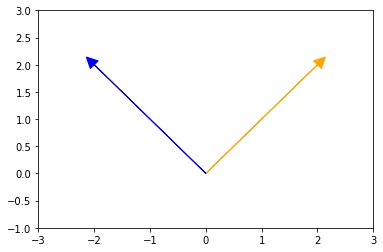

In [51]:
import matplotlib.pyplot as plt

plt.arrow(0,0, 2, 2, head_width=.2, head_length=0.2, color ='orange')
plt.arrow(0,0, -2, 2, head_width=.2, head_length=0.2, color ='blue')

plt.xlim(-3, 3)
plt.ylim(-1, 3)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [53]:
#They are not orthogonal because dp does not equal 0.

a = [-5, 3, 7]
b = [6, -8, 2]

dp = np.dot(a, b)
print(dp)

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [68]:
c = [2, -15, 6, 20]

# norm is magnitude of vector
normcsquared = (np.linalg.norm(c)**2) ##norm of c, squared
print(normcsquared)

#The dot product is the sum of the products of the corresponding entries of the two sequences of numbers.
cdot = np.dot(c, c) ## dot product of c
print(cdot)

#transposition is the flipping of a matrix over the main axis
c = np.asmatrix(c)
ctrans = c.T
ctransc = np.matmul(c, ctrans) ## c transposed times c
print(ctransc)

665.0
665
[[665]]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2 \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} + -8 \begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [70]:
## 

f = np.asmatrix([4, 12, 11, 9, 2])
fu = f / np.linalg.norm(f)
print(fu)

[[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

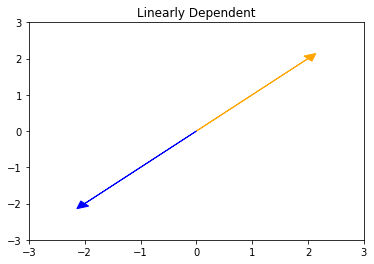

In [73]:
plt.arrow(0,0, 2, 2, head_width=.2, head_length=0.2, color ='orange')
plt.arrow(0,0, -2, -2, head_width=.2, head_length=0.2, color ='blue')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('Linearly Dependent')
plt.show()

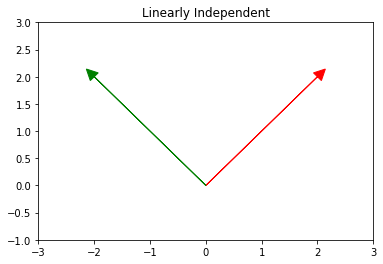

In [75]:
plt.arrow(0,0, 2, 2, head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, -2, 2, head_width=.2, head_length=0.2, color ='green')

plt.xlim(-3, 3)
plt.ylim(-1, 3)
plt.title('Linearly Independent')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Span = R     because g and h are linearly dependent.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Span = R3 because all vectors are linearly independent.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



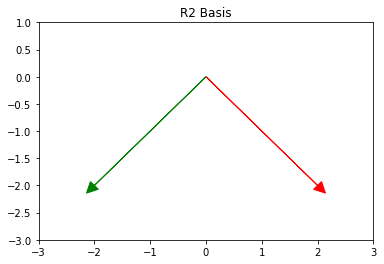

In [79]:
plt.arrow(0,0, 2, -2, head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, -2, -2, head_width=.2, head_length=0.2, color ='green')

plt.xlim(-3, 3)
plt.ylim(-3, 1)
plt.title('R2 Basis')
plt.show()

## 6.2 What does it mean to form a basis?

A basis comes from two (or more) vectors that can represent any point in some dimension of space.   R2 requires two linearly independed vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

P has a rank of 3

## 7.2 What does the rank of a matrix tell us?

It tells us how many vectors are unique to a basis.  The rank of a matrix can be found by counting the linearly independant vectors.  

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

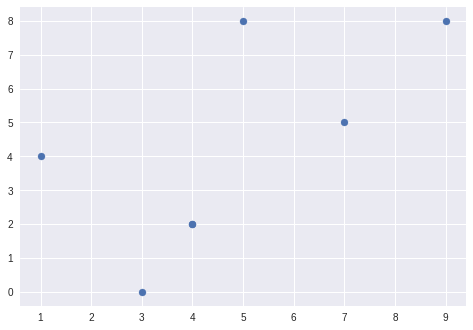

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()